numpy 기본 함수
  np.arange(15) : 0 ~ 14까지의 숫자를 1차원 배열로 생성
  arr.reshape(3,5) : 3행5열의 2차원배열로 생성.  배열 갯수가 맞아야 함.
  arr.dtype : 배열 요소의 자료형
  arr.shape :배열 구조 행열값
  arr.ndim  : 배열의 차수
  arr.itemsize : 요소의 바이트 크기
  arr.size : 요소의 갯수
  np.zeros((행,열)) : 요소의 값이 0인 배열 생성
  np.ones((행,열)) : 요소의 값이 1인 배열 생성
                 np.ones(10,dtype=int)
  np.eye(10,10) #10행10열 단위 행렬
  np.linspace(시작값,종료값,갯수) : 시작값부터 종료값까지 갯수만큼 균등분할하는 수치
  np.pi : 원주율 상수

난수 관련 함수
   np.random.random() : 난수 발생
   np.random.default_rng(1) : seed 값 설정
   np.random.randint(n): 0 ~ n-1 까지의 정수형 난수 리턴. 
   np.random.normal(평균,표준편차,데이터갯수) : 정규 분포 난수 생성
   np.random.choice(값의범위,선택갯수,재선택여부)

통계 관련 함수
   sum,min,max,mean,std
   max(axis=1) : 행중 최대값
   max(axis=0) : 열중 최대값
   cumsum(axis=1) : 행의 누적 합계
   cumsum(axis=0) : 열의 누적 합계
   argmax(axis=1) : 행 중 최대값의 인덱스
   argmax(axis=0) : 열 중 최대값의 인덱스
   argmin(axis=1) : 행 중 최소값의 인덱스
   argmin(axis=0) : 열 중 최소값의 인덱스
   
 arr.flat:배열의 요소들만 리턴
 np.floor: 작은 근사정수
 np.ceil : 큰 근사정수
 
 arr.ravel() #1차원배열로 변경
 arr.resize() : 배열 객체 자체를 변경


2개의 배열을 합하기
   np.vstack((i,j)) #행기준 합. 열의 갯수가 같아야 함
   np.hstack((i,j)) #열기준 합. 행의 갯수가 같아야 함.

배열 나누기
   np.hsplit(k,3) #3개로 열을 분리. 
   np.vsplit(k,2) #2개로 행을 분리. 


In [2]:
import seaborn as sns
df = sns.load_dataset("titanic")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# 데이터 전처리 : 원본데이터를 원하는 형태로 변경 하는 과정
df["deck"].unique()  #저장된 값들 조회
df["deck"].value_counts() #결측값을 제외한 값의 건수
df["deck"].value_counts(dropna=False) #결측값을 포함한 값의 건수

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64

In [7]:
df.deck.head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [8]:
#isnull() : 결측값인 경우 : True, 정상적인값:False
df.deck.head().isnull()

0     True
1    False
2     True
3    False
4     True
Name: deck, dtype: bool

In [9]:
#notnull() : 결측값인경우:False, 정상적인값:True
df.deck.head().notnull()

0    False
1     True
2    False
3     True
4    False
Name: deck, dtype: bool

In [13]:
#결측값의 갯수 조회
df.isnull().sum()
df.isnull().sum(axis=0) #컬럼별 결측값의 갯수
df.isnull().sum(axis=1) #행별 결측값의 갯수

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64

In [17]:
#결측값이 아닌 값의 갯수 조회
df.notnull().sum()
df.notnull().sum(axis=0) #컬럼별 결측값이 아닌 값의 갯수
df.notnull().sum(axis=1) #행별 결측값이 아닌 값의 갯수

0      14
1      15
2      14
3      15
4      14
       ..
886    14
887    15
888    13
889    15
890    14
Length: 891, dtype: int64

In [18]:
#dropna : 결측값 데이터 제거. inplace=True 있어야 자체 객체 변경됨
# thresh=500 : 결측값의 갯수가 500개 이상인 컬럼 제거
df_thresh = df.dropna(axis=1,thresh=500)
df_thresh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [20]:
#결측값을 가진 행을 제거
#subset=["age"] : 기준컬럼
#how="any"/"all" : 한개만 결측값 / 모든값이 결측값
#axis=0 : 행을 제거
df_age = df.dropna(subset=["age"],how="any",axis=0)
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB


In [23]:
# fillna : 결측값을 다른값으로 치환
#          inplace=True 가 있어야 객체 변경
# fillna("치환할값",옵션)

#age 컬럼의 값이 결측값인 경우 평균나이로 변경하기
#1. age 컬럼의 평균나이 조회하기
age_mean = df["age"].mean()
age_mean

np.float64(29.69911764705882)

In [24]:
#2. 나이평균으로 치환하기
df["age"].fillna(age_mean,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


C:\Users\123rl\AppData\Local\Temp\ipykernel_4424\2667230283.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(age_mean,inplace=True)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [33]:
#embark_town 컬럼의 결측값은 빈도수가 가장 많은 데이터 치환하기
#embark_town 값 중 가장 건수가 많은 값 조회하기
#df["embark_town"].unique()

most_freq = df["embark_town"].value_counts().index[0]
most_freq
most_freq = df["embark_town"].value_counts().idxmax() #최대값을 가진 인덱스 조회
most_freq

'Southampton'

In [34]:
#결측값의 데이터 조회
df[df["embark_town"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [35]:
#embark_town 컬럼의 값이 결측값인 데이터를 most_freq 데이터로 수정
df["embark_town"].fillna(most_freq,inplace=True)

In [38]:
df.loc[[61,829]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,Southampton,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,Southampton,yes,True


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [40]:
#embarked 컬럼의 결측값을 앞의 값으로 치환하기
#1. 결측값 데이터 조회하기
df[df["embarked"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,Southampton,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,Southampton,yes,True


In [41]:
df.loc[59:62]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False
60,0,3,male,22.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
61,1,1,female,38.0,0,0,80.0000,NaN,First,woman,False,B,Southampton,yes,True
62,0,1,male,45.0,1,0,83.4750,S,First,man,True,C,Southampton,no,False


In [42]:
df.loc[827:830]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
827,1,2,male,1.000000,0,2,37.0042,C,Second,child,False,NaN,Cherbourg,yes,False
828,1,3,male,29.699118,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,yes,True
829,1,1,female,62.000000,0,0,80.0000,NaN,First,woman,False,B,Southampton,yes,True
830,1,3,female,15.000000,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,yes,False


In [43]:
#3. 앞의 데이터로 치환하기
#method="ffill" : 앞의 데이터로 치환
#method="bfill" : 뒤의 데이터로 치환
df["embarked"].fillna(method="ffill",inplace=True)

C:\Users\123rl\AppData\Local\Temp\ipykernel_4424\412106500.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["embarked"].fillna(method="ffill",inplace=True)


In [44]:
df.loc[59:62]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False
60,0,3,male,22.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
61,1,1,female,38.0,0,0,80.0000,C,First,woman,False,B,Southampton,yes,True
62,0,1,male,45.0,1,0,83.4750,S,First,man,True,C,Southampton,no,False


In [45]:
df.loc[827:830]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
827,1,2,male,1.000000,0,2,37.0042,C,Second,child,False,NaN,Cherbourg,yes,False
828,1,3,male,29.699118,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,yes,True
829,1,1,female,62.000000,0,0,80.0000,Q,First,woman,False,B,Southampton,yes,True
830,1,3,female,15.000000,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,yes,False


In [47]:
import pandas as pd

In [48]:
# 중복데이터 처리
df = pd.DataFrame({"c1":['a','a','b','a','b'],
                   "c2":[1,1,1,2,2],
                   "c3":[1,1,2,2,2]})
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [49]:
#duplicated() : 중복데이터 찾기
#               중복된 경우 중복된 두번째 부터 True 리턴
# 
df_dup = df.duplicated()
df_dup 

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [50]:
#중복된 데이터 찾기
df[df_dup]

,c1,c2,c3
1,a,1,1


In [51]:
#drop_duplicates() : 중복된 데이터 지우기
df2 = df.drop_duplicates()
df2

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [52]:
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [53]:
#c1,c3 컬럼을 기준으로 중복 검색
col_dup = df[["c1","c3"]].duplicated()
col_dup

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [55]:
#BeautifulSoup : html,xml 태그 분석 모듈
from bs4 import BeautifulSoup  #pip install beautifulsoup4
import urllib.request as req

In [ ]:
url = "https://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp"
res = req.urlopen(url)
soup = BeautifulSoup(res,"html.parser")
title = soup.find("title").string
wf = soup.find("wf").string
''' 
CDATA Section : 순수 문자열 영역. xml로 파싱되지 않는 영역  <안녕> 
<![CDATA[ .... ]]>
'''

In [57]:
print(title)
print(wf)

기상청 육상 중기예보
○ (강수) 13일(토)~15일(월)은 남부지방과 제주도에, 16일(화)~19일(토)은 전국(제주도 제외), 20일(일)은 중부지방과 전라권에 비가 오겠습니다. <br />○ (기온) 이번 예보기간 아침 기온은 20~25도, 낮 기온은 27~32도로 평년(최저기온 21~23도, 최고기온 27~32도)과 비슷하겠습니다.<br />○ (주말전망) 13일(토)~14일(일) 남부지방과 제주도는 흐리고 비가 오겠고, 중부지방은 구름많겠습니다. 아침 기온은 20~24도, 낮 기온은 27~32도가 되겠습니다. <br />* (소나기 가능성) 13일(토)~15일(월)에는 오후에 중부지방을 중심으로 소나기가 내릴 가능성이 있겠습니다.<br />* (기온) 이번 예보기간에는 최고체감온도가 31도 이상으로 올라 무더운 날이 있겠고, 열대야가 나타나는 곳이 있겠습니다.<br />* (강수 유의 사항 및 변동성) 이번 예보기간 동안 정체전선의 영향으로 비가 오는 지역이 많겠고, 특히, 매우 강하고 많은 비가 내릴 가능성이 있겠습니다. <br />  한편, 정체전선의 위치를 비롯한 우리나라 주변 기압계 변화에 따라 강수지역과 시점 등 예보 변동성이 크겠으니, 앞으로 발표되는 최신 예보를 참고하기 바랍니다.


In [58]:
#wf 데이터를 <br />문자열로 분리하여 한줄씩 화면에 출력하기
for w in wf.split("<br />") :
    print(w)

○ (강수) 13일(토)~15일(월)은 남부지방과 제주도에, 16일(화)~19일(토)은 전국(제주도 제외), 20일(일)은 중부지방과 전라권에 비가 오겠습니다. 
○ (기온) 이번 예보기간 아침 기온은 20~25도, 낮 기온은 27~32도로 평년(최저기온 21~23도, 최고기온 27~32도)과 비슷하겠습니다.
○ (주말전망) 13일(토)~14일(일) 남부지방과 제주도는 흐리고 비가 오겠고, 중부지방은 구름많겠습니다. 아침 기온은 20~24도, 낮 기온은 27~32도가 되겠습니다. 
* (소나기 가능성) 13일(토)~15일(월)에는 오후에 중부지방을 중심으로 소나기가 내릴 가능성이 있겠습니다.
* (기온) 이번 예보기간에는 최고체감온도가 31도 이상으로 올라 무더운 날이 있겠고, 열대야가 나타나는 곳이 있겠습니다.
* (강수 유의 사항 및 변동성) 이번 예보기간 동안 정체전선의 영향으로 비가 오는 지역이 많겠고, 특히, 매우 강하고 많은 비가 내릴 가능성이 있겠습니다. 
  한편, 정체전선의 위치를 비롯한 우리나라 주변 기압계 변화에 따라 강수지역과 시점 등 예보 변동성이 크겠으니, 앞으로 발표되는 최신 예보를 참고하기 바랍니다.


In [59]:
#인터넷에서 수신된 내용을 forecast.xml 파일로 저장하기
import os.path
#os.path.exists(파일명) : 파일이 존재?. 
if not os.path.exists("data/forecast.xml") :
    #urlretrieve : 인터넷을 통해 전달 받은 데이터를 파일로 저장
    req.urlretrieve(url,"data/forecast.xml")

In [61]:
#forecast.xml 파일을 읽어서 BeautifulSoup 으로 분석하기
fp = open("data/forecast.xml")
soup = BeautifulSoup(fp,"html.parser")
#select_one : 태그 한개만 선택
#rss pubDate : rss 태그의 하위 태그 중 pubDate 태그 선택
pubdate=soup.select_one("rss pubDate").string
pubdate

c:\Users\123rl\miniconda3\Lib\html\parser.py:171: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


'2024년 07월 10일 (수)요일 06:00'

In [63]:
#location 태그들의 하위 태그 중 한개의 city,wf 태그의 내용 출력하기
#select() : 태그들. 배열로 리턴
#select_one : 태그한개. 태그 리턴
#soup.select("location") : location 태그 전부의 목록
for location in soup.select("location") :
    city = location.select_one("city").string #location 태그의 하위 태그중 city 태그 한개값
    wf = location.select_one("wf").string
    tmn = location.select_one("tmn").string
    tmx = location.select_one("tmx").string
    print(city, wf,tmn,tmx)

서울 맑음 23 32
인천 맑음 23 30
수원 맑음 22 31
파주 맑음 21 32
이천 맑음 20 32
평택 맑음 22 32
춘천 맑음 20 32
원주 맑음 21 32
강릉 구름많음 21 27
대전 구름많음 22 31
세종 구름많음 21 31
홍성 구름많음 21 31
청주 구름많음 23 32
충주 구름많음 20 31
영동 구름많음 20 30
광주 흐리고 비 23 31
목포 흐리고 비 23 29
여수 흐리고 비 23 27
순천 흐리고 비 22 30
광양 흐리고 비 22 29
나주 흐리고 비 22 31
전주 흐림 23 31
군산 흐림 22 30
정읍 흐림 22 32
남원 흐림 20 30
고창 흐림 22 30
무주 흐림 20 30
부산 흐리고 비 22 28
울산 흐리고 비 21 27
창원 흐리고 비 23 29
진주 흐리고 비 21 30
거창 흐리고 비 20 29
통영 흐리고 비 22 28
대구 흐림 22 30
안동 흐림 20 30
포항 흐림 22 26
경주 흐림 21 28
울진 흐림 20 25
울릉도 흐림 21 25
제주 흐리고 비 24 29
서귀포 흐리고 비 24 28


In [64]:
#find_all : 태그 들
#find : 태그 한개
for location in soup.find_all("location") :
    city = location.find("city").string #location 태그의 하위 태그중 city 태그 한개값
    wf = location.find("wf").string
    tmn = location.find("tmn").string
    tmx = location.find("tmx").string
    print(city, wf,tmn,tmx)

서울 맑음 23 32
인천 맑음 23 30
수원 맑음 22 31
파주 맑음 21 32
이천 맑음 20 32
평택 맑음 22 32
춘천 맑음 20 32
원주 맑음 21 32
강릉 구름많음 21 27
대전 구름많음 22 31
세종 구름많음 21 31
홍성 구름많음 21 31
청주 구름많음 23 32
충주 구름많음 20 31
영동 구름많음 20 30
광주 흐리고 비 23 31
목포 흐리고 비 23 29
여수 흐리고 비 23 27
순천 흐리고 비 22 30
광양 흐리고 비 22 29
나주 흐리고 비 22 31
전주 흐림 23 31
군산 흐림 22 30
정읍 흐림 22 32
남원 흐림 20 30
고창 흐림 22 30
무주 흐림 20 30
부산 흐리고 비 22 28
울산 흐리고 비 21 27
창원 흐리고 비 23 29
진주 흐리고 비 21 30
거창 흐리고 비 20 29
통영 흐리고 비 22 28
대구 흐림 22 30
안동 흐림 20 30
포항 흐림 22 26
경주 흐림 21 28
울진 흐림 20 25
울릉도 흐림 21 25
제주 흐리고 비 24 29
서귀포 흐리고 비 24 28


In [72]:
#네이버 환율정보 조회하기
url= "https://finance.naver.com/marketindex/"
res = req.urlopen(url)
soup = BeautifulSoup(res,"html.parser")
sel = lambda q : soup.select(q)  #q에 해당하는 태그목록들을 리턴 함수
#div.head_info : class속성의 값이 head_info인 div 태그
#rss pubDate : rss 태그의 하위 태그 중 pubDate 태그 선택
hlist = sel("div.head_info") 
print(hlist)
#class 속성이 h_lst 인 h3 태그를 선택
print("htitle ========>")
htitle = sel("h3.h_lst")
htitle

[<div class="head_info point_up">
<span class="value">1,385.50</span>
<span class="txt_krw"><span class="blind">원</span></span>
<span class="change">1.50</span>
<span class="blind">상승</span>
</div>, <div class="head_info point_dn">
<span class="value">857.97</span>
<span class="txt_krw"><span class="blind">원</span></span>
<span class="change"> 0.14</span>
<span class="blind">하락</span>
</div>, <div class="head_info point_up">
<span class="value">1,499.25</span>
<span class="txt_krw"><span class="blind">원</span></span>
<span class="change">2.18</span>
<span class="blind">상승</span>
</div>, <div class="head_info point_up">
<span class="value">190.03</span>
<span class="txt_krw"><span class="blind">원</span></span>
<span class="change">0.15</span>
<span class="blind">상승</span>
</div>, <div class="head_info point_up">
<span class="value">161.3300</span>
<span class="txt_jpy"><span class="blind">엔</span></span>
<span class="change">0.7200</span>
<span class="blind">상승</span>
</div>, <div class

[<h3 class="h_lst"><span class="blind">미국 USD</span></h3>,
 <h3 class="h_lst"><span class="blind">일본 JPY(100엔)</span></h3>,
 <h3 class="h_lst"><span class="blind">유럽연합 EUR</span></h3>,
 <h3 class="h_lst"><span class="blind">중국 CNY</span></h3>,
 <h3 class="h_lst"><span class="blind">달러/일본 엔</span></h3>,
 <h3 class="h_lst"><span class="blind">유로/달러</span></h3>,
 <h3 class="h_lst"><span class="blind">영국 파운드/달러</span></h3>,
 <h3 class="h_lst"><span class="blind">달러인덱스</span></h3>,
 <h3 class="h_lst"><span class="blind">WTI</span></h3>,
 <h3 class="h_lst"><span class="blind">휘발유</span></h3>,
 <h3 class="h_lst"><span class="blind">국제 금</span></h3>,
 <h3 class="h_lst"><span class="blind">국내 금</span></h3>]

In [78]:
taglist=[] #상승,하락값 저장
titlelist=[] #통화명
for tag, title in zip(hlist, htitle) :
    #tag : 환율정보
    #title : 통화명
    print(title.select_one("span.blind").string, end="\t")  #통화명
    value = tag.select_one("span.value").string
    print(value, end=" ")
    change = tag.select_one("span.change").string #환율변동값
    print(change, end="\t")
    blinds = tag.select("span.blind")  #상승/하락 여부
    b = tag.select("span.blind")[0].string
    b = tag.select("span.blind")[-1].string 
    print(b, end="*******\n")    
    if b == '하락' :
       taglist.append(float(change) * -1)  #하락인 경우 음수
    else :
       taglist.append(float(change))
    titlelist.append(title.select_one("span.blind").string)
print(taglist) 
print(titlelist)


미국 USD	1,385.50 1.50	상승*******
일본 JPY(100엔)	857.97  0.14	하락*******
유럽연합 EUR	1,499.25 2.18	상승*******
중국 CNY	190.03 0.15	상승*******
달러/일본 엔	161.3300 0.7200	상승*******
유로/달러	1.0815  0.0018	하락*******
영국 파운드/달러	1.2797  0.0034	하락*******
달러인덱스	104.8000 0.1400	상승*******
WTI	81.41  0.92	하락*******
휘발유	1708.63 0.89	상승*******
국제 금	2367.9 4.40	상승*******
국내 금	105472.43 471.15	상승*******
[1.5, -0.14, 2.18, 0.15, 0.72, -0.0018, -0.0034, 0.14, -0.92, 0.89, 4.4, 471.15]
['미국 USD', '일본 JPY(100엔)', '유럽연합 EUR', '중국 CNY', '달러/일본 엔', '유로/달러', '영국 파운드/달러', '달러인덱스', 'WTI', '휘발유', '국제 금', '국내 금']


In [79]:
#국내금 데이터 제외
taglist = taglist[:-1]
titlelist = titlelist[:-1]
print(taglist)
print(titlelist)

[1.5, -0.14, 2.18, 0.15, 0.72, -0.0018, -0.0034, 0.14, -0.92, 0.89, 4.4]
['미국 USD', '일본 JPY(100엔)', '유럽연합 EUR', '중국 CNY', '달러/일본 엔', '유로/달러', '영국 파운드/달러', '달러인덱스', 'WTI', '휘발유', '국제 금']


([<matplotlib.axis.XTick at 0x244609c7c80>,
 [Text(0, 0, '미국 USD'),
  Text(1, 0, '일본 JPY(100엔)'),
  Text(2, 0, '유럽연합 EUR'),
  Text(3, 0, '중국 CNY'),
  Text(4, 0, '달러/일본 엔'),
  Text(5, 0, '유로/달러'),
  Text(6, 0, '영국 파운드/달러'),
  Text(7, 0, '달러인덱스'),
  Text(8, 0, 'WTI'),
  Text(9, 0, '휘발유'),
  Text(10, 0, '국제 금')])

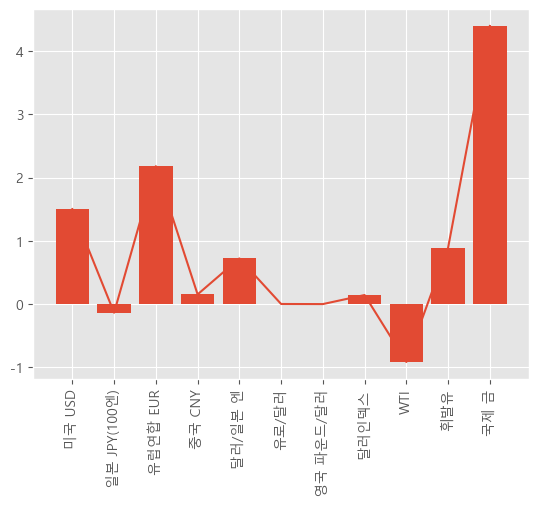

In [84]:
#상승/하락 여부 그래프로 출력하기
import matplotlib.pyplot as plt
from matplotlib import  rc
plt.style.use("ggplot")
plt.rcParams['axes.unicode_minus']=False #음수표시 : -
rc('font', family='Malgun Gothic') #한글폰트 설정
xlab = range(len(titlelist)) #0 ~ titlelist요소의크기 - 1
plt.bar(xlab,taglist) #막대그래프
plt.plot(xlab,taglist) #선그래프
#x축 label 설정
#xlab=> titlelist 값으로 변경
#rotation='vertical' : label을 세로로 출력
plt.xticks(xlab,titlelist,rotation='vertical')


In [93]:
# 셀레니움 모듈 : 브라우저를 직접 제어함 : 로그인, 버튼 클릭등
from selenium import webdriver #pip install selenium
import time

셀레니움 사용 설정
1. Edge WebDriver 다운받기 
    https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/?form=MA13LH
2. 압축풀기
3. C:\Users\123rl\Downloads\edgedriver_win64\msedgedriver.exe

### 크롬 드라이버
http://chromedriver.chromium.org/downloads

1. 크롬 브라우저의 버전 확인하기
     도움말 > 크롬정보 (108.0.5359.99)


In [99]:
#edge_driver = "C:/Users/123rl/Downloads/edgedriver_win64/msedgedriver.exe"
driver = webdriver.Edge() #새로운 브라우저 open
driver.get("http://python.org") #브라우저 http://python.org 요청 => 브라우저 화면에 표시
time.sleep(1) #1초 대기

In [100]:
#find_elements(태그검색방법,태그) : 선택된 태그 들
#find_element : 선택된 태그
# css selector : css 에서 사용되는 선택자 방식
# #top ul.menu li => id 속성이 top 인 태그의 하위 태그 중 ul 태그의 class 속성의 값이 menu인 태그의
#                    하위 태그 중 li 태그  
#   #top : id="top" 태그. 
#   ul.menu : ul 태그 중 class="menu" 인 태그
#   li   : li 태그 
menus = driver.find_elements("css selector",'#top ul.menu li') #li 태그들
print("menus[0]:",menus[0].text)
print("menus[1]:",menus[1].text)
for m in menus :
    if m.text=="PyPI" :  #li 태그 한개
        pypi = m
        print(m.tag_name,m.text)
pypi.click() #li 태그 클릭
time.sleep(5)


menus[0]: Python
menus[1]: PSF
li PyPI


In [101]:
driver.quit()        

In [103]:
### 네이버에 로그인 하기
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

execute_script(자바스크립트문장) : 자바스크립트 문장 실행
document.getElementsByName('id')[0].value='입력받은네이버아이디'"
   => name="id"인 첫번째 태그에 화면에서 입력받은 네이버아이디 입력
    document.getElementsByName('id') : html에서 name속성의 값이 id인 태그 들
find_elements(선택방법, 선택자) : 여러개의 태그 선택
find_element(선택방법, 선택자) : 한개의 태그 선택    
   선택방법 : 태그를 찾아 가는 방법
      By.XPATH("xpath") : xml 방식으로 태그를 찾음
        //*[@id="log.login"]
          // : 루트노드. 최상위노드
          *  : 모든노드 
          [] : 속성값
          @id : id 속성
          log.login :  속성의 값
      By.CLASS_NAME("class name") : class 속성값      
      By.CSS_SELECTOR("css selector") : css 문서에서 사용되는 선택자 방식
      By.ID("id") : id 속성값
      By.TAG_NAME("tag name") :  태그 이름

In [105]:
driver = webdriver.Edge() #Edge 브라우저 실행
driver.get("https://nid.naver.com/nidlogin.login?mode=form&url=https://www.naver.com/") #네이버로그인화면
id = input("네이버 아이디를 입력하세요:") #문자열 입력
driver.execute_script("document.getElementsByName('id')[0].value='"+id+"'")
pw = input("네이버 비밀번호를 입력하세요 : ")
time.sleep(1)
driver.execute_script\
("document.getElementsByName('pw')[0].value='"+pw+"'")
time.sleep(1)
driver.find_element("xpath",'//*[@id="log.login"]').click()
#driver.find_element(By.XPATH,'//*[@id="log.login"]').click()


In [121]:
# daum 페이지에서 이미지 다운받아 저장하기
import os 
driver = webdriver.Edge()
driver.get("https://search.daum.net/search?w=img&nil_search=btn&DA=NTB&enc=utf8&q=%EC%9E%A5%EB%AF%B8")
time.sleep(3)
images = driver.find_elements("css selector","div.image_main img")
img_url = []
for image in images :
    #get_attribute('src') : img 태그의 src 속성의 값
    url = image.get_attribute('src')
    #url.startswith("http") : url 문자열이 http문자열로 시작하면?
    if url.startswith("http") :  #url : 이미지가 저장된 url 데이터. 
       img_url.append(url)
driver.quit() #브라우저 닫기

In [122]:
for u in img_url :
    print(u)

https://search4.kakaocdn.net/argon/229x0_80_wr/3d7kzi1QIfT
https://search2.kakaocdn.net/argon/229x0_80_wr/TYbflJUxP
https://search3.kakaocdn.net/argon/229x0_80_wr/BPQRQVrYGcx
https://search1.kakaocdn.net/argon/229x0_80_wr/I3EctJmAZN7
https://search1.kakaocdn.net/argon/229x0_80_wr/9ofRZfIH54K
https://search1.kakaocdn.net/argon/229x0_80_wr/6VtR4GqtIAV
https://search3.kakaocdn.net/argon/229x0_80_wr/2CrCA041OYT
https://search1.kakaocdn.net/argon/229x0_80_wr/Ilrb9iMhmLd
https://search4.kakaocdn.net/argon/229x0_80_wr/IrTkSPX82yi
https://search3.kakaocdn.net/argon/229x0_80_wr/JszTjMhxNXI
https://search1.kakaocdn.net/argon/229x0_80_wr/1FSDmM72UCO
https://search2.kakaocdn.net/argon/229x0_80_wr/1wg6CzqZyaj
https://search3.kakaocdn.net/argon/229x0_80_wr/1pN75onCu6S
https://search1.kakaocdn.net/argon/229x0_80_wr/Crnp57xEPaE
https://search4.kakaocdn.net/argon/229x0_80_wr/KNYK65jVdrB
https://search2.kakaocdn.net/argon/229x0_80_wr/6i7vps0iYT9
https://search1.kakaocdn.net/argon/229x0_80_wr/A3sfAhIxvQP

In [123]:
img_folder = './img'
if not os.path.isdir(img_folder) :  #os.path.isdir(파일) :  파일이 폴더?
    os.mkdir(img_folder) #폴더 생성
#img_url : 리스트    
#enumerate(img_url) : 요소의위치,img_url 요소
for index, link in enumerate(img_url) :
      #index : 요소의 위치값
      #link : 요소의 값. 이미지가 저장된 url
	req.urlretrieve(link, f'./img/{index}.jpg')      

In [124]:
#현재 화면을 이미지 파일로 저장하기
driver = webdriver.Edge()
driver.get("https://search.daum.net/search?w=img&nil_search=btn&DA=NTB&enc=utf8&q=%EC%9E%A5%EB%AF%B8")
time.sleep(1)
#save_screenshot("저장파일명")
driver.save_screenshot("img/rosepage.png")
driver.quit()


데이터 속성 설명
order_id : 주문번호
quantity : 아이템의 주문수량
item_name : 주문한 아이템의 이름
choice_description : 주문한 아이템의 상세 선택 옵션
item_price : 주문 아이템의 가격 정보

In [126]:
import pandas as pd
#sep="\t" : 탭으로 구분자 사용
chipo = pd.read_csv("data/chipotle.tsv",sep="\t")
chipo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [127]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [128]:
#order_id 컬럼의 자료형을 문자열로 변경하기
#astype : DataFrame의 요소의 자료형을 변경
chipo["order_id"] = chipo["order_id"].astype(str)
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


In [129]:
chipo["item_price"].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [131]:
#item_price 컬럼을 실수형으로 변환
chipo["item_price"] = chipo["item_price"].str.replace("$","").astype(float)
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB


In [133]:
chipo["item_price"].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [134]:
chipo["item_price"].sum()

np.float64(34500.16)

주문당 평균 주문금액
주문번호 주문금액
  1        1
  1        3
  2        1
  2        1 

  전체주문금액(6) / 주문건수(2) => 3
   주문당 평균 주문 금액 : 3

In [136]:
#전체 주문금액
hap = chipo["item_price"].sum()
hap

np.float64(34500.16)

In [139]:
#주문건수
cnt = len(chipo.groupby("order_id")) #order_id 갯수
cnt

1834

In [140]:
#groupby : 컬럼을 기준으로 데이터를 분리
grouped = chipo.groupby("order_id")
for key,g in grouped :
    print("===key:",key,end=",")
    print("===cnt:",len(g),type(g))

===key: 1,===cnt: 4 <class 'pandas.core.frame.DataFrame'>
===key: 10,===cnt: 2 <class 'pandas.core.frame.DataFrame'>
===key: 100,===cnt: 2 <class 'pandas.core.frame.DataFrame'>
===key: 1000,===cnt: 2 <class 'pandas.core.frame.DataFrame'>
===key: 1001,===cnt: 2 <class 'pandas.core.frame.DataFrame'>
===key: 1002,===cnt: 2 <class 'pandas.core.frame.DataFrame'>
===key: 1003,===cnt: 2 <class 'pandas.core.frame.DataFrame'>
===key: 1004,===cnt: 1 <class 'pandas.core.frame.DataFrame'>
===key: 1005,===cnt: 3 <class 'pandas.core.frame.DataFrame'>
===key: 1006,===cnt: 8 <class 'pandas.core.frame.DataFrame'>
===key: 1007,===cnt: 3 <class 'pandas.core.frame.DataFrame'>
===key: 1008,===cnt: 3 <class 'pandas.core.frame.DataFrame'>
===key: 1009,===cnt: 4 <class 'pandas.core.frame.DataFrame'>
===key: 101,===cnt: 2 <class 'pandas.core.frame.DataFrame'>
===key: 1010,===cnt: 4 <class 'pandas.core.frame.DataFrame'>
===key: 1011,===cnt: 4 <class 'pandas.core.frame.DataFrame'>
===key: 1012,===cnt: 2 <class '

In [138]:
chipo.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",8.75


In [142]:
#주문당 평균 주문건수
print(hap/cnt)
print(chipo.groupby("order_id")["item_price"].sum().mean())

18.811428571428575
18.811428571428568


In [ ]:
#한번의 주문시 주문금액이 50달러 이상인 주문의 id 출력하기
# 주문번호  주문금액
#    1       25
#    1       30
#    2        2
#    2       45
#    50달러 이상인 주문id : 1

In [150]:
#주문당 합계 금액
order_id_tot = chipo.groupby("order_id").sum()
order_id_tot["item_price"]
result = order_id_tot[order_id_tot["item_price"] >= 50]
result.index
result["item_price"]

order_id
1006     71.40
1051     59.35
1360     52.18
1443    160.74
1449     95.39
1454     85.24
1483    139.00
1559     82.44
1586     51.20
1660     70.25
1764     55.55
1786    114.30
1825     66.50
195      81.00
205     109.90
343      54.05
488      50.90
491     102.00
511     104.59
561      52.45
577      71.15
691     118.25
759      86.30
818      70.85
848      55.45
916      52.45
926     205.25
953      81.14
Name: item_price, dtype: float64

In [151]:
#주문당 50달러 이상인 주문데이터 출력하기
chipo[chipo["order_id"].isin(result.index)]

,order_id,quantity,item_name,choice_description,item_price
448,195,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream...",8.75
449,195,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
450,195,1,Barbacoa Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.75
451,195,1,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
452,195,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.25
...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75
4592,1825,1,Barbacoa Burrito,"[Tomatillo Red Chili Salsa, [Rice, Fajita Vege...",11.75
4593,1825,1,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Rice, Sour Cream, ...",11.75


In [153]:
chipo.groupby("item_name").min()

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,1076,1,[Coke],6.49
Barbacoa Bowl,1000,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69
Barbacoa Burrito,1002,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",8.69
Barbacoa Crispy Tacos,110,1,"[Fresh Tomato Salsa, Guacamole]",8.99
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99
Bottled Water,1009,1,NaN,1.09
Bowl,193,1,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",7.40
Burrito,214,1,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.40


In [152]:
#item_name 별 단가를 조회하기
price_one = chipo.groupby("item_name").min()["item_price"]
price_one

item_name
6 Pack Soft Drink                        6.49
Barbacoa Bowl                            8.69
Barbacoa Burrito                         8.69
Barbacoa Crispy Tacos                    8.99
Barbacoa Salad Bowl                      9.39
Barbacoa Soft Tacos                      8.99
Bottled Water                            1.09
Bowl                                     7.40
Burrito                                  7.40
Canned Soda                              1.09
Canned Soft Drink                        1.25
Carnitas Bowl                            8.99
Carnitas Burrito                         8.69
Carnitas Crispy Tacos                    8.99
Carnitas Salad                           8.99
Carnitas Salad Bowl                      9.39
Carnitas Soft Tacos                      8.99
Chicken Bowl                             8.19
Chicken Burrito                          8.19
Chicken Crispy Tacos                     8.49
Chicken Salad                            8.19
Chicken Salad Bowl      

Text(0.5, 1.0, '상품단가 분포')

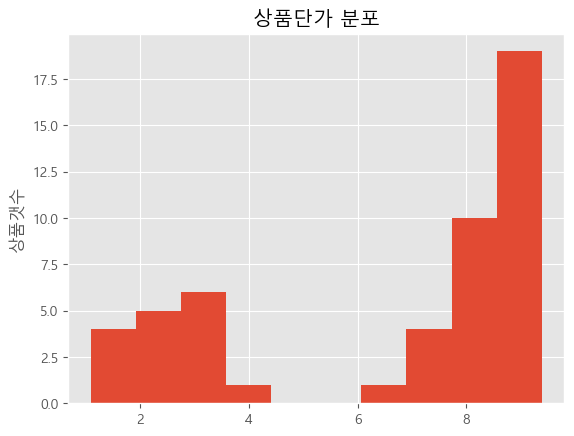

In [154]:
#단가의 분포를 히스토그램으로 출력하기
import matplotlib.pyplot as plt
plt.rc("font",family="Malgun Gothic")
plt.hist(price_one) 
plt.ylabel("상품갯수")
plt.title("상품단가 분포")

Text(0.5, 1.0, '상품단가 분포')

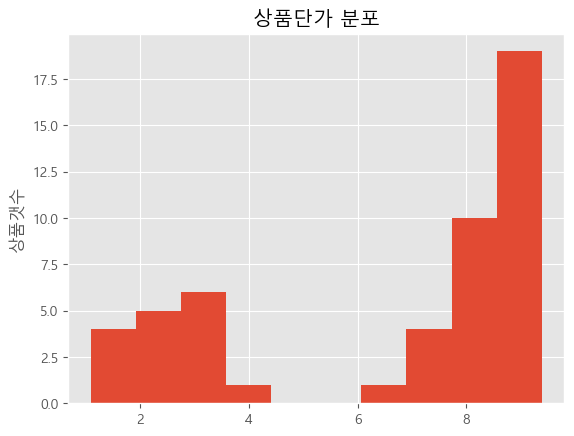

In [155]:
price_one.plot(kind="hist")
plt.ylabel("상품갯수")
plt.title("상품단가 분포")

In [158]:
#단가가 가장 높은 상품 10개 조회하기
max_price10 = price_one.sort_values(ascending=False)[:10]
max_price10.index

Index(['Carnitas Salad Bowl', 'Barbacoa Salad Bowl', 'Steak Salad Bowl',
       'Carnitas Crispy Tacos', 'Barbacoa Soft Tacos', 'Carnitas Salad',
       'Carnitas Bowl', 'Carnitas Soft Tacos', 'Steak Soft Tacos',
       'Barbacoa Crispy Tacos'],
      dtype='object', name='item_name')

In [159]:
#가격이 가장 높은 상품을 출력하기
max_item = price_one.max()
list(price_one[price_one==max_item].index)

['Barbacoa Salad Bowl', 'Carnitas Salad Bowl', 'Steak Salad Bowl']